# Analysis of the Ca8452 line

In [10]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits as f
# import sunpy
from matplotlib import transforms
# from scipy.io import readsav
# from ISPy.io import solarnet
from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
import use_nessi3 as un
from importlib import reload
from PIL import Image
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# functies uittesten met Ha

In [12]:
# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2016-05-14/"
file_n="E:\solar flares\data\\2016-05-14\\fits\Halpha6563\\flare_slovak_2016_05_14T11_38_16.fits"
# "fits/Halpha6563/crispex.6563.11_38_16.time_corrected.aligned.icube"
# "E:\solar flares\data\2016-05-14\fits\Halpha6563\crispex.6563.11_38_16.time_corrected.aligned.icube"

header = f.getheader(file_n)
cube = f.getdata(file_n)

def ttff(i):
    return file_n

number_of_frames = cube.shape[0]

def alternative_datacube(frame):
    if frame >= 0 and frame < number_of_frames:
        return cube[frame]
    else:
        raise IndexError(f'Given framenumber {frame} exceeds number of frames {number_of_frames}  or is negative')

cube.shape
(239, 0, 15, 962, 980)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_19184\2845707119.py:3: SyntaxWarning: invalid escape sequence '\s'
  file_n="E:\solar flares\data\\2016-05-14\\fits\Halpha6563\\flare_slovak_2016_05_14T11_38_16.fits"


(239, 0, 15, 962, 980)

In [13]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  980                                                  
NAXIS2  =                  962                                                  
NAXIS3  =                   15                                                  
NAXIS4  =                  239                                                  
EXTEND  =                    T                                                  

In [14]:
tseries = rs( "fits/Halpha6563/tseries.6563.11_38_16.calib.sav")
tseries


{'tstep': 15,
 'clip': array([12,  4,  2,  1], dtype='>i2'),
 'tile': array([ 6,  8, 14, 24], dtype='>i2'),
 'scale': 16.891891,
 'ang': array([ 0.05608517,  0.05572392,  0.05536295,  0.05500225,  0.0546418 ,
         0.05428161,  0.05392166,  0.053562  ,  0.05320262,  0.0528435 ,
         0.05248465,  0.05212605,  0.05176776,  0.05140977,  0.05105201,
         0.05069456,  0.05033739,  0.04998054,  0.04962398,  0.04926768,
         0.04891168,  0.04855597,  0.04820056,  0.04784465,  0.04748984,
         0.04713534,  0.04678115,  0.04642727,  0.04607367,  0.04572042,
         0.04536748,  0.04501486,  0.04466256,  0.04431059,  0.04395895,
         0.04360763,  0.04325665,  0.042906  ,  0.04255568,  0.04220571,
         0.04185608,  0.04150679,  0.04115782,  0.04080923,  0.04046099,
         0.04011311,  0.03976558,  0.03941842,  0.03907159,  0.03872515,
         0.03837908,  0.03803338,  0.03768806,  0.03734311,  0.03699855,
         0.03665436,  0.03631056,  0.03596712,  0.0356241 ,  

In [15]:
time_list = tseries["time"][:239]
print(time_list, [t.decode("utf-8")[:-1] for t in time_list])

[b'11:38:26.844\x00' b'11:38:39.231\x00' b'11:38:51.617\x00'
 b'11:39:04.003\x00' b'11:39:16.389\x00' b'11:39:28.775\x00'
 b'11:39:41.162\x00' b'11:39:53.548\x00' b'11:40:05.934\x00'
 b'11:40:18.320\x00' b'11:40:30.706\x00' b'11:40:43.093\x00'
 b'11:40:55.479\x00' b'11:41:07.864\x00' b'11:41:20.251\x00'
 b'11:41:32.637\x00' b'11:41:45.023\x00' b'11:41:57.408\x00'
 b'11:42:09.793\x00' b'11:42:22.179\x00' b'11:42:34.565\x00'
 b'11:42:46.951\x00' b'11:42:59.337\x00' b'11:43:11.751\x00'
 b'11:43:24.137\x00' b'11:43:36.523\x00' b'11:43:48.909\x00'
 b'11:44:01.295\x00' b'11:44:13.682\x00' b'11:44:26.068\x00'
 b'11:44:38.454\x00' b'11:44:50.840\x00' b'11:45:03.226\x00'
 b'11:45:15.612\x00' b'11:45:27.998\x00' b'11:45:40.384\x00'
 b'11:45:52.770\x00' b'11:46:05.156\x00' b'11:46:17.542\x00'
 b'11:46:29.928\x00' b'11:46:42.314\x00' b'11:46:54.700\x00'
 b'11:47:07.087\x00' b'11:47:19.473\x00' b'11:47:31.859\x00'
 b'11:47:44.245\x00' b'11:47:56.631\x00' b'11:48:09.017\x00'
 b'11:48:21.404\x00' b'1

In [16]:
zeros = [np.array(alternative_datacube(0)[:, 920, 0]), 
         np.array(alternative_datacube(0)[:, 550, 924]), 
         np.array(alternative_datacube(0)[:, 924, 200])]
alternative_datacube(0).shape, zeros

((15, 962, 980),
 [array([5896, 5691, 5437, 4969, 3825, 2643, 2174, 2011, 2064, 2491, 3545,
         4885, 5564, 5778, 5823], dtype='>i2'),
  array([6135, 5884, 5504, 4830, 3672, 3007, 2593, 2326, 2256, 2516, 3189,
         4608, 5642, 5880, 5937], dtype='>i2'),
  array([6248, 6056, 5710, 5558, 4947, 3634, 2383, 1916, 1839, 2326, 3990,
         5249, 5856, 5995, 6027], dtype='>i2')])

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_19184\4258708675.py:4: SyntaxWarning: invalid escape sequence '\s'
  spectfilename="E:\solar flares\data\\2016-05-14\\fits\Halpha6563\spectfile.6563.idlsave",
E:\solar flares/data/2017-09-06\use_nessi3.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:448: SyntaxWarning: invalid escape sequence '\A'
  labelx="wavelength $[\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1232: SyntaxWarning: invalid escape sequence '\A'
  labely=" $intensity$  [arbitrary units]", figname=None , error=False)
E:\solar flares/data/2017-09-06\use_nessi3.py:1922: SyntaxWarning: invalid escape sequence '\D'
  print(f'at an intesity of {A[i,j]}. For a standard deviation of {STD[i]}.\n')
E:\solar 

E:\solar flares\data\2016-05-14\fits\Halpha6563\flare_slovak_2016_05_14T11_38_16.fits
the shape of the data is (239, 0, 15, 962, 980)
the wavelengths are self._wavel = array([6561.5999999 , 6561.79999995, 6562.        , 6562.19999999,
       6562.39999998, 6562.59999999, 6562.8       , 6563.        ,
       6563.2       , 6563.40000001, 6563.60000002, 6563.80000001,
       6564.        , 6564.20000005, 6564.4000001 ], dtype='>f8')
(962, 980) (962, 980)
Boundary
Blue=Outside, yellow=Inside


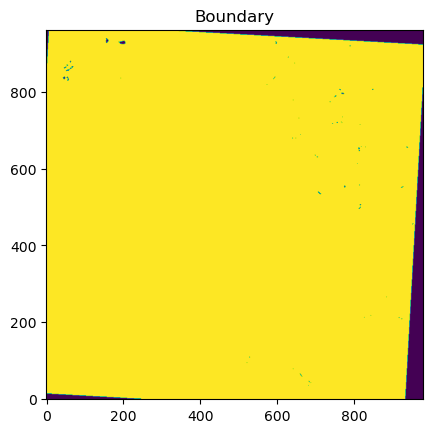

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [17]:
reload(un)
Ha = un.SST_data_from_multiple_fits_files(
    ttff,
    spectfilename="E:\solar flares\data\\2016-05-14\\fits\Halpha6563\spectfile.6563.idlsave", 
    number_of_frames=number_of_frames,
    time=time_list, 
    name_of_line='Ha16', 
    thresh=[0, np.percentile(alternative_datacube(0), 99.5)],  
    boundary_methode='search', 
    boundary_arguments = {"error":0.03, "zeros":zeros},  #, "index_of_zero":5, 
    alternative_datacube=alternative_datacube, 
    with_stokes=False,
    with_time=True,
    shape = (239, 0, 15, 962, 980), 
    cont_point=None
)

In [18]:
secs = un.get_TIME(Ha)*60
print(secs)
print(len(secs))
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")
print(f'{Ha.shape=}')

[ 626.  639.  651.  664.  676.  688.  701.  713.  725.  738.  750.  763.
  775.  787.  800.  812.  825.  837.  849.  862.  874.  886.  899.  911.
  924.  936.  948.  961.  973.  986.  998. 1010. 1023. 1035. 1047. 1060.
 1072. 1085. 1097. 1109. 1122. 1134. 1147. 1159. 1171. 1184. 1196. 1209.
 1221. 1233. 1246. 1258. 1270. 1283. 1295. 1308. 1320. 1332. 1345. 1357.
 1370. 1382. 1394. 1407. 1419. 1431. 1444. 1456. 1469. 1481. 1493. 1506.
 1518. 1531. 1543. 1555. 1568. 1580. 1593. 1605. 1617. 1630. 1642. 1654.
 1667. 1679. 1692. 1704. 1716. 1729. 1741. 1754. 1766. 1778. 1791. 1803.
 1815. 1828. 1840. 1853. 1865. 1877. 1890. 1902. 1915. 1927. 1939. 1952.
 1964. 1977. 1989. 2001. 2014. 2026. 2038. 2051. 2063. 2076. 2088. 2100.
 2113. 2125. 2138. 2150. 2162. 2175. 2187. 2199. 2212. 2224. 2237. 2249.
 2261. 2274. 2286. 2299. 2311. 2323. 2336. 2348. 2360. 2373. 2385. 2398.
 2410. 2422. 2435. 2447. 2460. 2472. 2484. 2497. 2509. 2521. 2534. 2546.
 2559. 2571. 2583. 2596. 2608. 2621. 2633. 2645. 26

[[2.0, 1.875], [7.0, 1.875], [12.0, 1.875]] 15


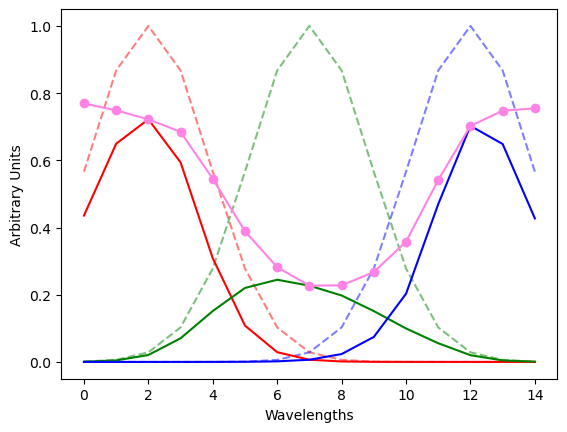

In [19]:
# %matplotlib inline
Meansd = un.guess_filters(len(Ha._wavel))
print(Meansd,len(Ha._wavel) )
Ha.update_filters(Meansd)
Ha.plot_filt(880,900)

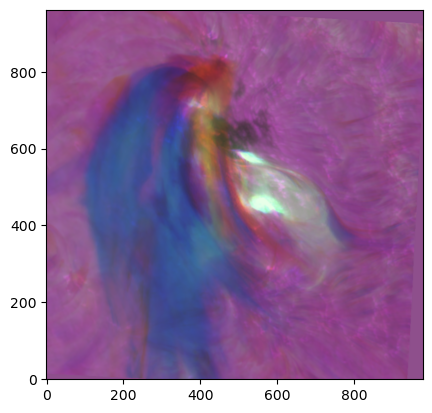

In [20]:
# %matplotlib inline

Ha.ccp_frame(10,Show=False)
Ha.thresh=[1e-7,2e-5]
plt.imshow(Ha.current_ccp[:,:], origin='lower')
# plt.imshow(Ha.boundary[::-1,:], alpha=0.2)
plt.show()

#interesting pixel: (1030, 975)

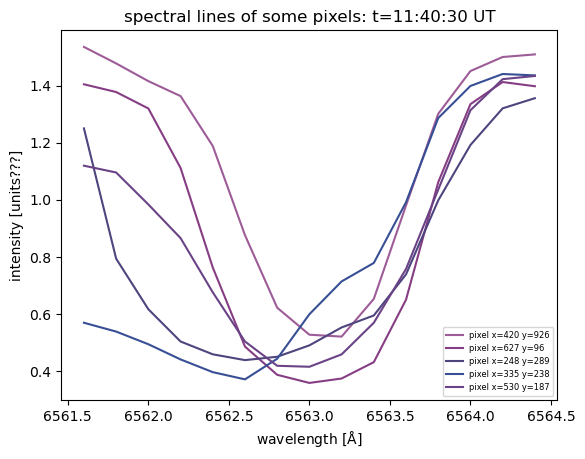

In [21]:
Ha.interesting_pixels( frame=10, pixels=[(600, 600)], rand=True, numb=5)

COCOPLOT at  t=11:38:26 UT (frame number 0 )


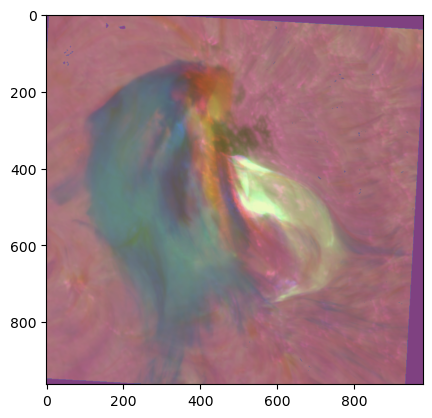

COCOPLOT at  t=11:46:42 UT (frame number 40 )


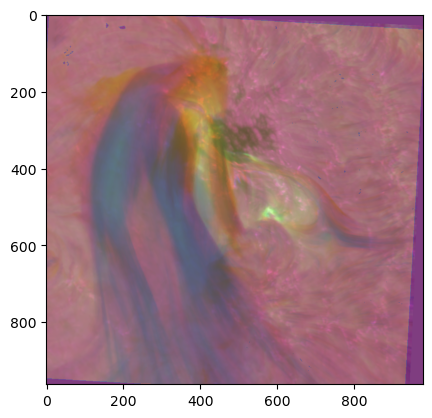

COCOPLOT at  t=11:54:57 UT (frame number 80 )


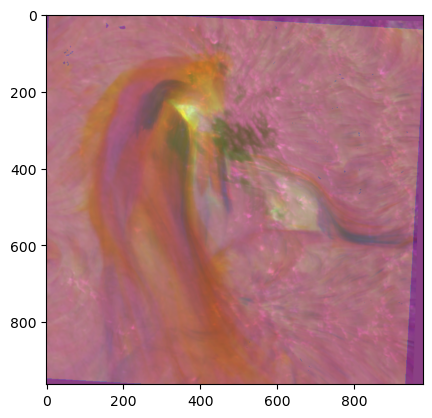

COCOPLOT at  t=12:03:13 UT (frame number 120 )


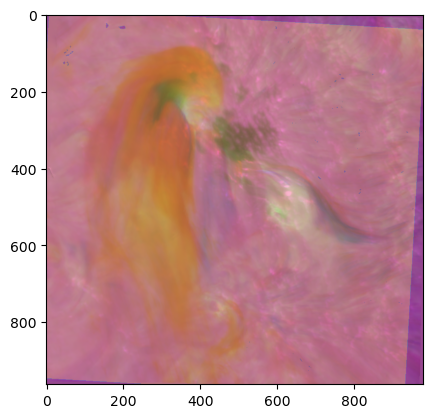

COCOPLOT at  t=12:11:28 UT (frame number 160 )


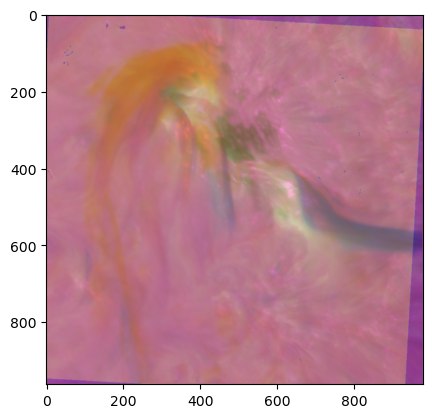

COCOPLOT at  t=12:19:56 UT (frame number 200 )


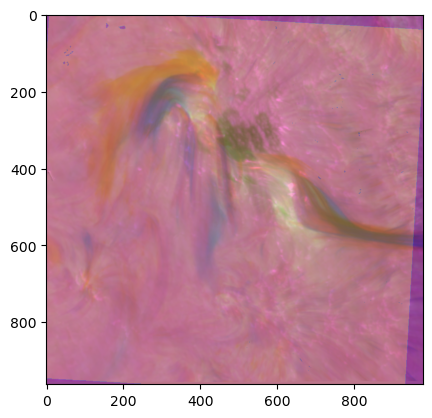

In [22]:
# Many COCOPLOTS
r = Ha._number_of_frames
for i in range(0,r,40):
    tstr = Ha.time_of_frame(i)
    print("COCOPLOT at ", tstr, "(frame number", i,")")
    Ha.ccp_frame(i,Show=False)
    plt.imshow(Ha.current_ccp[::-1,:])

    plt.imshow(Ha.boundary[::-1,:], alpha=0.2)
    plt.show()


COCOPLOT at  t=11:44:38 UT (frame number 30 )


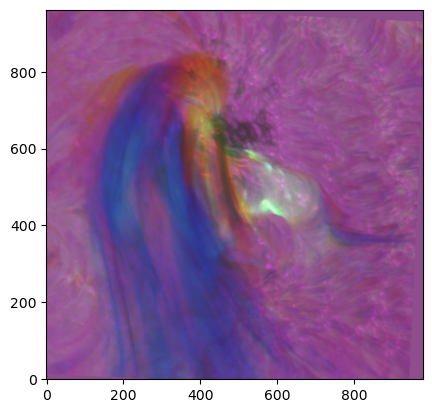

In [23]:
Ha.ccp_frame(30)
pixels=[[30,60],[631,646],[194,268],[298,323],[472,204]]
# Haurrent_ccp[0:30:5,0:60:5,:]

In [24]:
Ha.calculate__FOV_spect_over_time()


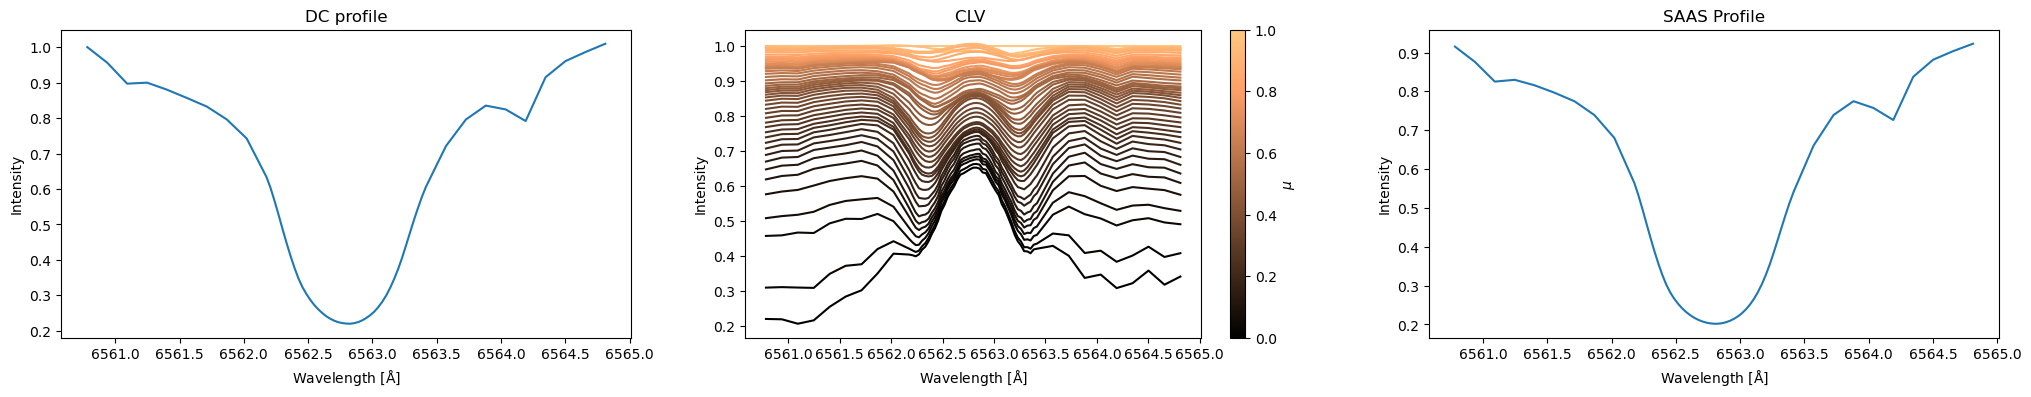

In [25]:
reload(un)
theor_Ha = un.linestudier("E:/solar flares/data/2017-09-06/fits/6563_clv.fits", nr=101)


In [ ]:
# %matplotlib widget
# %matplotlib inline
frame = 30

X = [[(750,940), (80,300)], [(650,975), (294,662)],[(120,300), (600,1000)], [(900, 1000), (700, 900)], [(800,920), (10,100)] 
     , [(20,220), (20,220)]]

Ha.possible_quiet_sun_patches(frame, theor_line = theor_Ha, X=X)

In [24]:
# the chosen quiet sun patch is 
color_wanted_patch = "purple"

# choose from
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

the edges of the patch are denoted by the xlim: (20, 220) and ylim: (20, 220)


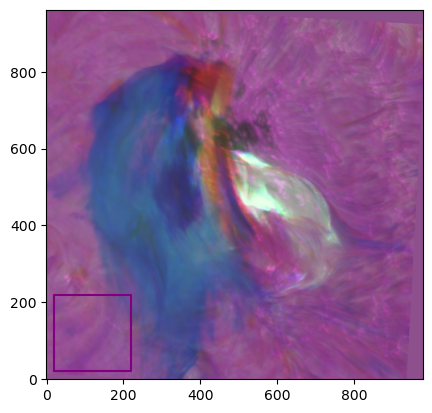

In [25]:
ind = int(colors.index(color_wanted_patch))

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
Ha.set_quiet_sun(frame, xlim, ylim, show=False, color=color_wanted_patch)

## Finding $\mu$

In [26]:
def timeframe_to_extent(frame, timeframe_to_filename_fits, flip=False, invert=False, shift=(0,0)):
    with f.open(timeframe_to_filename_fits(frame)) as io :
        wvl = io[1].data[0][0]
    extent = wvl[0,0:2,0:2, 0:2]
    a,b = shift
    if not flip:
        extent = [extent[0,0, 0]+a, extent[1,1, 0]+a, extent[0,0, 1]+b, extent[1,1, 1]+b]
    else:
        extent = [extent[0,0, 1]+a, extent[1,1, 1]+a, extent[0,0, 0]+b, extent[1,1, 0]+b]
    if invert:
        extent = [extent[1], extent[0], extent[3], extent[2]]
    print(f"extent timeframe {frame} is ", extent)
    return extent

def extent2mid(extent):
    return ((extent[0]+extent[1])/2, (extent[2]+extent[3])/2)

def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    rad_dist =  (x**2 + y**2)**0.5/radius
    return np.cos(np.arcsin(rad_dist))

import numpy as np

def rotate_mesh_around_average(xx, yy, angle):
  """
  Rotates an xy mesh around its average position.

  Args:
      xx: A 2D NumPy array representing the x-coordinates of the mesh.
      yy: A 2D NumPy array representing the y-coordinates of the mesh.
      angle: The rotation angle in radians. Positive values represent counter-clockwise rotation.

  Returns:
      A tuple of 2D NumPy arrays representing the rotated x and y coordinates (xx_rot, yy_rot).
  """

  # Calculate the average x and y coordinates
  avg_x = np.mean(xx)
  avg_y = np.mean(yy)

  # Shift the mesh to center it around the average
  xx_centered = xx - avg_x
  yy_centered = yy - avg_y

  # Rotate the centered mesh coordinates
  xx_rot = np.cos(angle) * xx_centered -np.sin(angle) * yy_centered  + avg_x
  yy_rot = np.sin(angle) * xx_centered + np.cos(angle) * yy_centered + avg_y

  return xx_rot, yy_rot



def extent_to_grid(extent, shape, invert=False, angle=0):

    x = np.linspace(extent[0], extent[1], shape[4])
    y = np.linspace(extent[2], extent[3], shape[3])
    if invert:
        x = x[::-1]
        y = y[::-1]

    xx, yy = np.meshgrid(x, y)
    if angle != 0:
        xx, yy = rotate_mesh_around_average(xx, yy, angle)

    MU = calculate_mu(xx,yy)
    print("does MU contain nan's?", np.any(np.isnan(MU)))
    return xx, yy, MU


def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]

def local_rotation(extent, rad_rot):
    mid = extent2mid(extent)
    x = np.array(mid) 
    R = np.array([[np.cos(rad_rot), -np.sin(rad_rot)], [np.sin(rad_rot), np.cos(rad_rot)]])
    y = np.dot(R, x)
    t = x-y

    return transforms.Affine2D().rotate_deg(rad_rot/np.pi*180).translate(t[0], t[1])

def square_full_mu_mesh(X,Y, angle, num=200):
    X = np.array([np.min(X), np.max(X)])
    Y = np.array([np.min(Y), np.max(Y)])
    X,Y = np.meshgrid(X,Y)
    X,Y = rotate_mesh_around_average(X,Y, angle)
    X = np.linspace(np.min(X), np.max(X), num)
    Y = np.linspace(np.min(Y), np.max(Y), num)
    X,Y = np.meshgrid(X,Y)
    MU = calculate_mu(X,Y)
    return MU, X, Y

def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name="", rotate=0):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame, Show=False)
        tr = local_rotation(extent, rotate)
        ax.imshow(Image.fromarray(over.current_ccp), transform=tr + ax.transData, origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    MU_, X, Y = square_full_mu_mesh(X,Y, angle=0, num=200)
    CS = ax.contour(X, Y, MU_)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        X, Y, _ = extent_to_grid(extent, (0,0,0,2,2), invert=False, angle=0)
        print(X,Y)
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp, rotate)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 

does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.38384570165861676 for timeframe 0
does MU contain nan's? False
[[847. 907.]
 [847. 907.]] [[-96. -96.]
 [-36. -36.]]
Coundourplot succesfully saved.


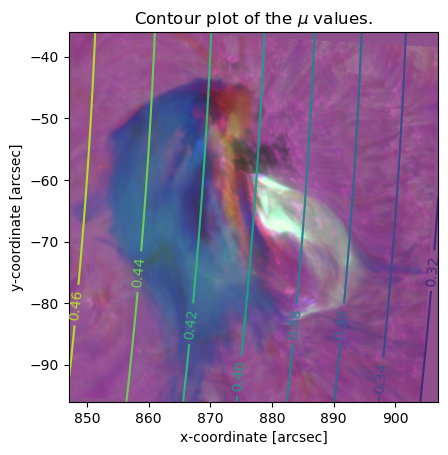

In [32]:



angle = 0
frame = 0    
position  =  (877,-66)

width = 60
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fyp = [position[0] - width / 2, position[0] + width / 2, *fyp]
extent = fyp
xx, yy, MU = extent_to_grid(extent, Ha.shape, invert=False, angle=angle)
xx0=xx
yy0=yy

mu = give_mu_contourplot(
    MU,
    xx,
    yy,
    extent,
    over=Ha,
    save=True,
    save_name=Ha.name_of_line,
    timeFrame=frame,
    rotate=angle
)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


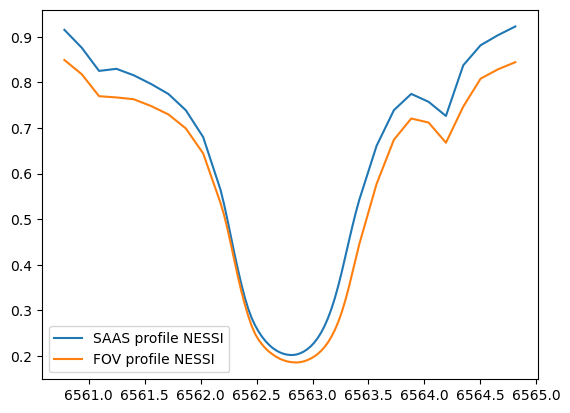

In [33]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63)

the edges of the patch are denoted by the xlim: (20, 220) and ylim: (20, 220)


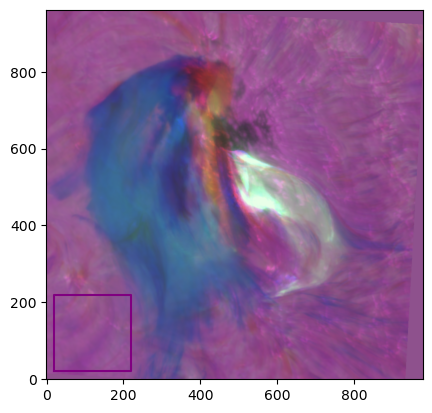

The quiet sun is pick at x (854.3237997957099, -88.53902185223725) with average              mu 0.4460020947557206
[[0.88390915 0.88397302 0.88403688 ... 0.89649061 0.89655448 0.89661834]
 [0.88390915 0.88397302 0.88403688 ... 0.89649061 0.89655448 0.89661834]
 [0.88390915 0.88397302 0.88403688 ... 0.89649061 0.89655448 0.89661834]
 ...
 [0.88390915 0.88397302 0.88403688 ... 0.89649061 0.89655448 0.89661834]
 [0.88390915 0.88397302 0.88403688 ... 0.89649061 0.89655448 0.89661834]
 [0.88390915 0.88397302 0.88403688 ... 0.89649061 0.89655448 0.89661834]] [[-0.09873733 -0.09873733 -0.09873733 ... -0.09873733 -0.09873733
  -0.09873733]
 [-0.09867227 -0.09867227 -0.09867227 ... -0.09867227 -0.09867227
  -0.09867227]
 [-0.0986072  -0.0986072  -0.0986072  ... -0.0986072  -0.0986072
  -0.0986072 ]
 ...
 [-0.08592021 -0.08592021 -0.08592021 ... -0.08592021 -0.08592021
  -0.08592021]
 [-0.08585515 -0.08585515 -0.08585515 ... -0.08585515 -0.08585515
  -0.08585515]
 [-0.08579009 -0.08579009 -0.085

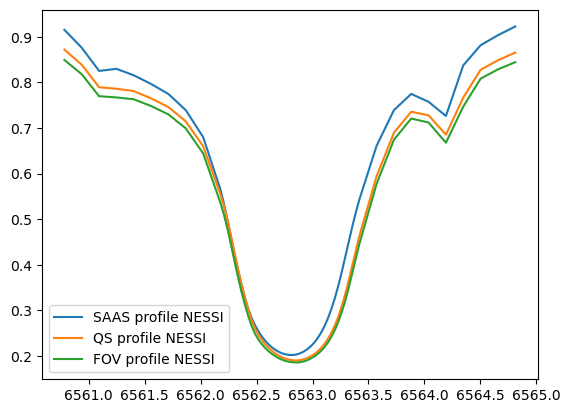

{'frame': 0, 'xlim': (20, 220), 'ylim': (20, 220), 'color': 'purple'}

In [34]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Ha.quiet_sun

[6561.5999999  6561.79999995 6562.         6562.19999999 6562.39999998
 6562.59999999 6562.8        6563.         6563.2        6563.40000001
 6563.60000002 6563.80000001 6564.         6564.20000005 6564.4000001 ] [1.47609664 1.43201509 1.37482773 1.26171472 0.99059014 0.61358424
 0.48692836 0.4649822  0.49736143 0.64990691 0.9673054  1.26655413
 1.39599592 1.43607328 1.4442051 ] [0.7595879  0.72794914 0.66765008 0.53552976 0.32369972 0.21936912
 0.19126018 0.20150948 0.2670742  0.44423943 0.61111234 0.71110627
 0.72960048 0.68936226 0.78747358]
[0.20294363 2.42524285]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 645.0158545726637
        x: [ 1.351e-01  1.960e+00]
      nit: 11
      jac: [-4.578e-05  5.341e-05]
 hess_inv: [[ 6.407e-07 -3.203e-06]
            [-3.203e-06  1.601e-05]]
     nfev: 126
     njev: 38


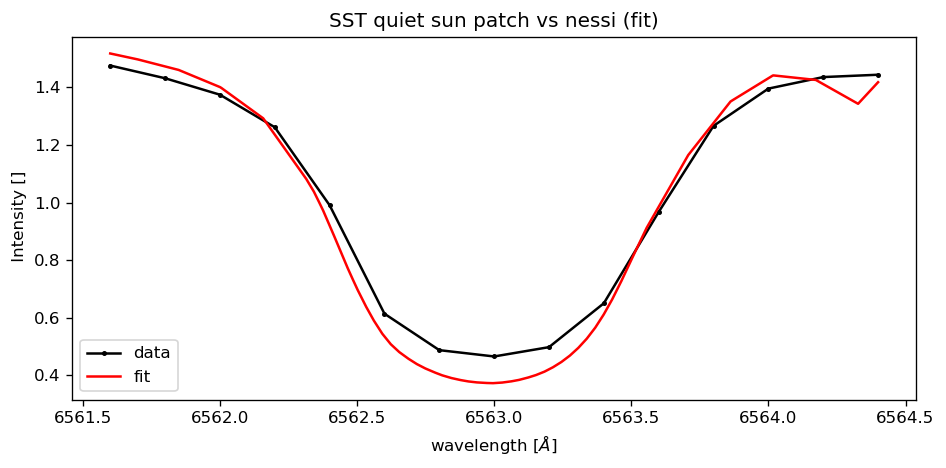

de p-waarde is  3.4684987875206227e-06 
Chi^2 reduced= 49.6166041978972 
aantal vrijheidgraden= 13 
chi^2= 645.0158545726637
we behouden de fit tot op een betrouwbaarheidsniveau van  3.4684987875206227e-06 
Oftewel verwerp als p-waarde <lpha-niveau 


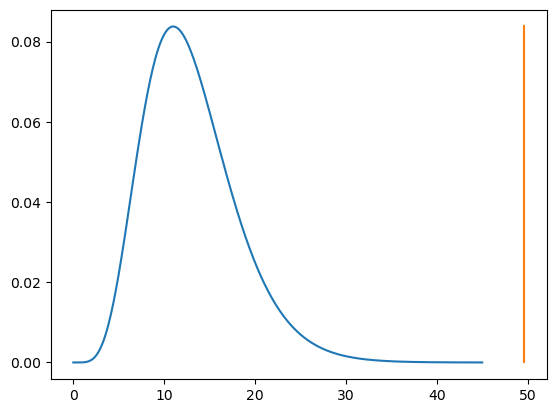

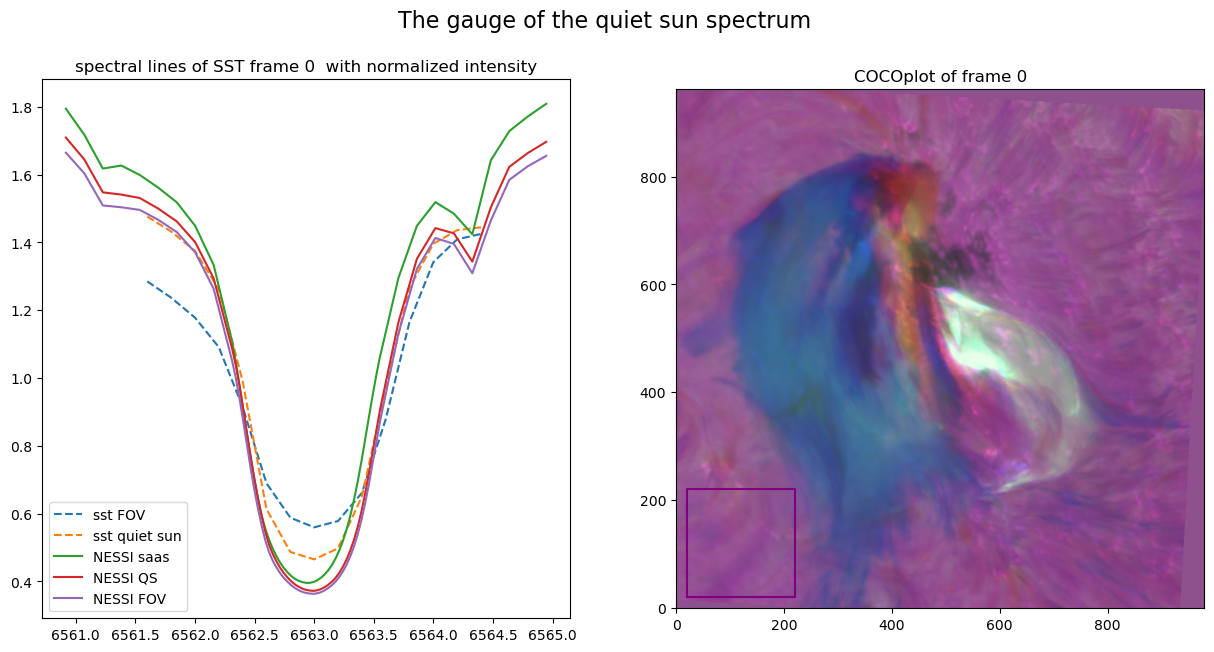

In [35]:
reload(un)
un.fit_qs_to_NESSI(theor_Ha, Ha)

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [173] at time ['t=12:14:09 UT'].
The areafactor for THIS flare is 0.001198929892768104 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 96.35%.


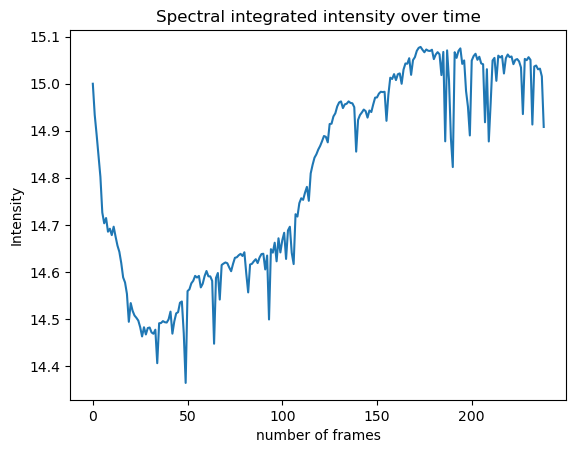

In [36]:
un.save_for_further_analysis(Ha, theor_Ha)


# Movie Making

Intensity limit calculation for first time.
Intensity limit is saved.
frame: 0, b'11:38:26.844\x00', total number of frames: 239 


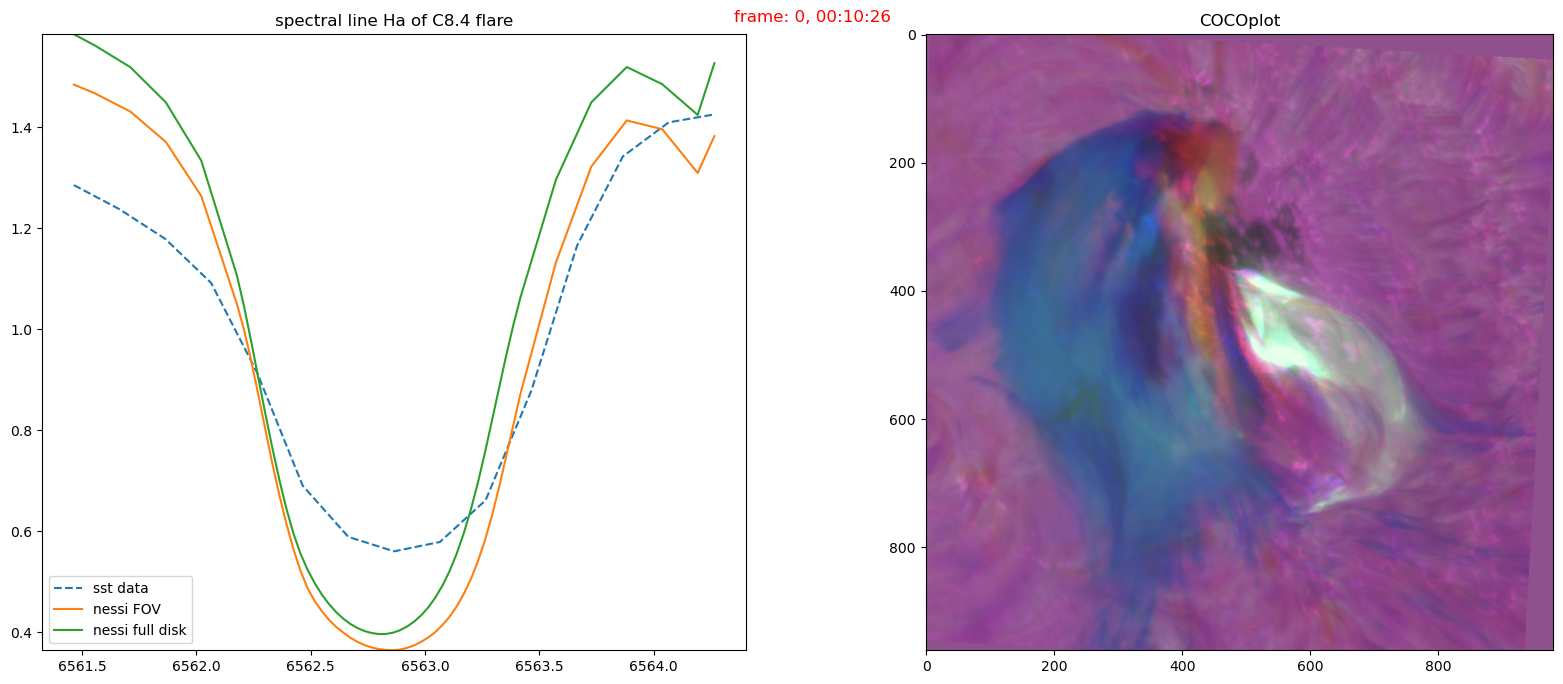

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 

: 

In [ ]:
# fill in here all arguments
theor_line = theor_Ha
sst_data = Ha
name_of_flare = "C8.4"
name_of_line = "Ha"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)
